### This notebook analyzes the predictions of the trading model. <br/>At different thresholds, how effective is the model at predicting<br/> larger-than-average range days?

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
pwd

'/Users/markconway/Projects/AlphaPy/alphapy/examples/Trading Model'

In [4]:
cd output

/Users/markconway/Projects/AlphaPy/alphapy/examples/Trading Model/output


In [5]:
ls

predictions_20170425.csv    rankings_20170425.csv
probabilities_20170425.csv


This file contains the ranked predictions of the test set.

In [6]:
ranking_frame = pd.read_csv('rankings_20170425.csv')

In [7]:
ranking_frame.columns

Index(['date', 'tag', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'cma_3', 'abovema_3',
       ...
       'rmax_5', 'wr_5', 'rmax_6', 'wr_6', 'rmax_7', 'wr_7', 'rmax_10',
       'wr_10', 'prediction', 'probability'],
      dtype='object', length=180)

The probabilities are in descending order. Observe the greater number of True values at the top of the rankings versus the bottom.

In [8]:
ranking_frame.rrover.head(20)

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10     True
11    False
12    False
13    False
14    False
15     True
16     True
17    False
18     True
19     True
Name: rrover, dtype: bool

In [9]:
ranking_frame.rrover.tail(20)

436    False
437    False
438    False
439    False
440    False
441    False
442    False
443    False
444     True
445    False
446    False
447     True
448    False
449    False
450    False
451    False
452    False
453    False
454    False
455    False
Name: rrover, dtype: bool

Let's plot the True/False ratios for each probability decile. These ratios should roughly reflect the trend in the calibration plot.

In [10]:
ranking_frame['bins'] = pd.qcut(ranking_frame.probability, 10, labels=False)

In [11]:
grouped = ranking_frame.groupby('bins')

In [12]:
def get_ratio(series):
    ratio = series.value_counts()[1] / series.size
    return ratio

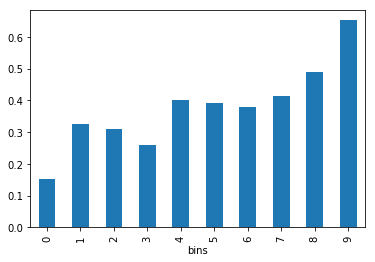

In [13]:
grouped['rrover'].apply(get_ratio).plot(kind='bar')

#### We conclude that the model does have some value, especially with more training data.<br/><br/>1. For high probabilities, we could deploy a breakout or trend system.<br/><br/>2. For low probabilities, we could use a counter-trend system.<br/><br/>3. Mid-range probabilities have no predictive power in this model.